<a href="https://colab.research.google.com/github/garrettspringsted/STAT-7220-Applied-Experimental-Design/blob/main/Copy_of_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "garrettspringsted"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/garrettspringsted/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments/STAT-7220-Applied-Experimental-Design/Comparative Experiments/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/garrettspringsted/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments/STAT-7220-Applied-Experimental-Design/Comparative Experiments/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

**Answer 1.** The objective of this experiment is determing whether the aging time of beer affects the International Bitterness Units (IBU's) of the beer in each aging tank.


**Question 2.** Specify the outcome variable

**Answer 2.** The Outcome Variable(DV) of this experiment is the Level of IBU's in each tank of beer.


**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Answer 3.** The Independent Variable(IV) of this ecperiment is the number of weeks the beer spent aging in the tanks.


**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.



**Question 5.** State the null and alternative hypotheses for this experiment.

-The Null Hypothesis for this experiment would be where Aging has no impact on the IBU of the Aging Groups

$$ H_0: \mu_1 = \mu_2 = \mu_3 $$

-The Alternative Hypothesis would be where at least one mean for Aging will differ.

$$  \begin{align} H_1: \mu_{\text{3weeks}} \neq \mu_{\text{4weeks}} \neq \mu_{\text{5weeks}}\\
H_1: \mu_{\text{3weeks}} \neq \mu_{\text{5weeks}}
\end{align}
$$




**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Answer 6.** In the summary analysis I can see that the mean between 3 Weeks and 4 Weeks is nearly 13 point difference in IBUs and the difference between 4 weeks and 5 weeks is slightly closer with a 7 point difference in IBUs. A difference of this many points may prove high significance

When looking at the visual boxplot I can see that there is a bigger difference between Week 3 and Week 4 with minimal overlap which may prove significance. Weeks 4 and 5 both show more overlap indicating less differentiation though still significant enough difference.


In [ ]:
%pip install openpyxl

## Import pandas ##

import pandas as pd

## Import IPA.xlsx File ##

IPA_data = pd.read_excel("/IPA.xlsx")

## Integrity Check ##

print(IPA_data.info())

## Group the dataframe by the "Treatment"
## column and calculate mean/sd for the
## "Temperature" column ##

summary_stats = IPA_data.groupby('Weeks')['IBU'].agg(['mean','std'])

print(summary_stats)

## Calculate the Grand Mean of IBU ##

mu_hat = IPA_data['IBU'].mean()

## Calculate the group means of Temperature, grouped by Treatment ##

group_means = IPA_data.groupby('Weeks')['IBU'].mean().reset_index()
group_means = group_means.rename(columns={'IBU': 'mean_IBU'})

## Calculate the difference between group means and the grand mean ##

tau_hat = group_means['mean_IBU'] - mu_hat

## Print Results ##

print("Grand Mean:", mu_hat)
print("\nGroup Means:")
print(group_means)
print("\nTau Hats:")
print(tau_hat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None
           mean       std
Weeks                    
3 Weeks  49.216  8.300656
4 Weeks  62.751  8.250384
5 Weeks  69.725  5.631258
Grand Mean: 60.56399999999999

Group Means:
     Weeks  mean_IBU
0  3 Weeks    49.216
1  4 Weeks    62.751
2  5 Weeks    69.725

Tau Hats:
0   -11.348
1     2.187
2     9.161
Name: mean_IBU, dtype: float64




**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Answer 7.**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit One-Way ANOVA Model ##

mod = ols("IBU ~ Weeks", data=IPA_data).fit()

## Get the ANOVA table ##

IPA_tab = sm.stats.anova_lm(mod,typ=1)

print(IPA_tab)

            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  2174.83994  1087.419970  19.339842  0.000006
Residual  27.0  1518.12718    56.226933        NaN       NaN


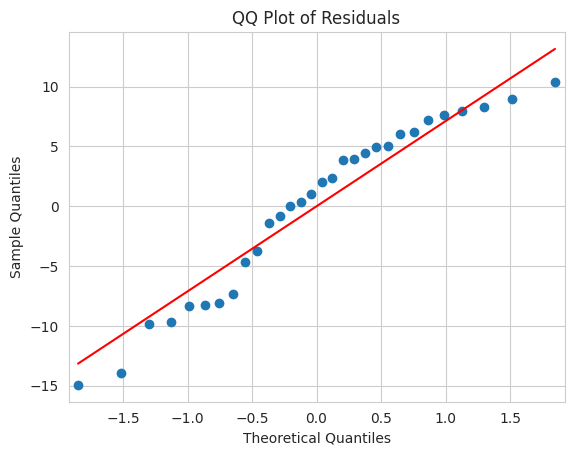

In [ ]:
IPA_mod = ols("IBU~Weeks",data=IPA_data).fit()

## Extract Model Residuals ##

residuals = IPA_mod.resid

## Generate QQ plot using seaborn ##

sm.qqplot(residuals, line ='s')
plt.title("QQ Plot of Residuals")
plt.show()



**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?



**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.